In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [6]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_df.shape

(60000, 785)

In [10]:
test_df.shape

(10000, 785)

In [5]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

In [5]:
X_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

X_test = test_data[:, 1:] /255
y_test = test_data[:, 0]

In [6]:
X_train , X_validate, y_train, y_validate = train_test_split( X_train, y_train, test_size = 0.2, random_state = 12345 )

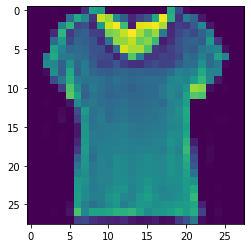

In [7]:
image = X_train[100, :].reshape((28,28))

plt.imshow(image)
plt.show()

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# **Create the CNN:**

1) Define the Model

2) Compile/Train the Model

3) Fit the model

In [12]:
im_rows = 28
im_cols = 28

batch_size = 512
im_shape = (im_rows, im_cols, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)
X_validate = X_validate.reshape(X_validate.shape[0], *im_shape)

In [16]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [53]:
tensorboard = TensorBoard(
    log_dir = r'logs\{}'.format('cnn_1layer'),
    write_graph = True,
    write_grads = True,
    histogram_freq = 1,
    write_images = True
)

cnn_model.compile( 
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(lr=0.001), 
    metrics=['accuracy'] 
)

In [54]:
cnn_model.fit(
    X_train , y_train, batch_size = batch_size, 
    epochs=10, verbose=1, validation_data=(X_validate, y_validate),
    callbacks = [tensorboard]
)

Epoch 1/10
60/60 [==============================] - 9s 150ms/step - loss: 0.9070 - accuracy: 0.6999 - val_loss: 0.5420 - val_accuracy: 0.8158
Epoch 2/10
60/60 [==============================] - 7s 116ms/step - loss: 0.5035 - accuracy: 0.8231 - val_loss: 0.4449 - val_accuracy: 0.8467
Epoch 3/10
60/60 [==============================] - 7s 120ms/step - loss: 0.4415 - accuracy: 0.8450 - val_loss: 0.4070 - val_accuracy: 0.8620
Epoch 4/10
60/60 [==============================] - 7s 120ms/step - loss: 0.4002 - accuracy: 0.8580 - val_loss: 0.3801 - val_accuracy: 0.8685
Epoch 5/10
60/60 [==============================] - 7s 116ms/step - loss: 0.3790 - accuracy: 0.8662 - val_loss: 0.3626 - val_accuracy: 0.8770
Epoch 6/10
60/60 [==============================] - 7s 116ms/step - loss: 0.3559 - accuracy: 0.8758 - val_loss: 0.3518 - val_accuracy: 0.8814
Epoch 7/10
60/60 [==============================] - 8s 136ms/step - loss: 0.3443 - accuracy: 0.8802 - val_loss: 0.3377 - val_accuracy: 0.8839
Epoch 

In [55]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.4f}".format(score[1]))

Test Loss: 0.3135
Test Accuracy: 0.8913
